<div style="max-width:66ch;">

---

## 0. Iris flower dataset (*)

In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the ```datasets``` module from scikit-learn to load the iris dataset. 

&nbsp; a) Check keys on the loaded data and check what the different values for each key are.


In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

data_dict = load_iris()

data_dict.keys()





dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [125]:
data_dict["data"].shape

(150, 4)

In [126]:
data_dict["target"].shape


(150,)

In [127]:
data_dict["target"][:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [128]:
data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [129]:
print(data_dict["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [130]:
data_dict["frame"]

In [131]:
data_dict["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [132]:
data_dict["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']


&nbsp; b) Now insert the data into a DataFrame. 


In [133]:
df = pd.DataFrame(data_dict["data"], columns=data_dict["feature_names"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



&nbsp; c) Do some EDA to get an understanding of the dataset. 


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [135]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


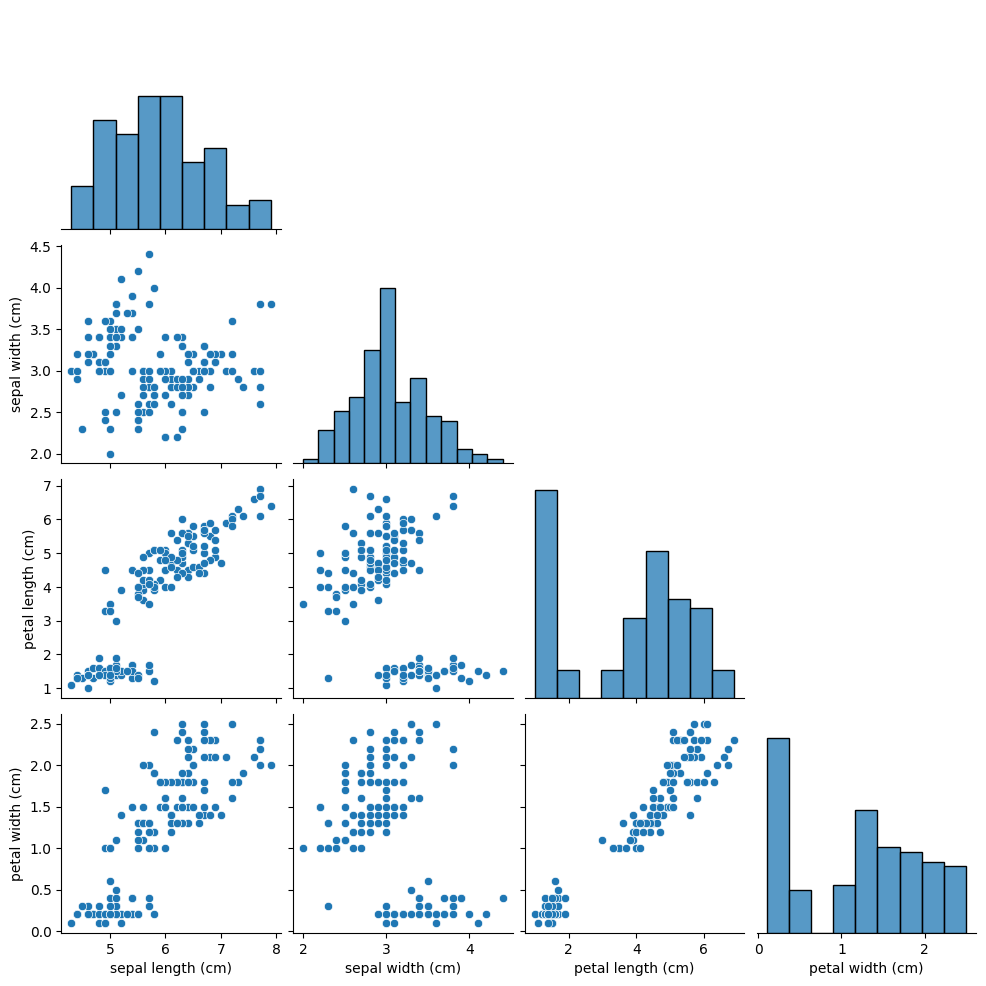

In [136]:
sns.pairplot(df, corner=True)



&nbsp; d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?


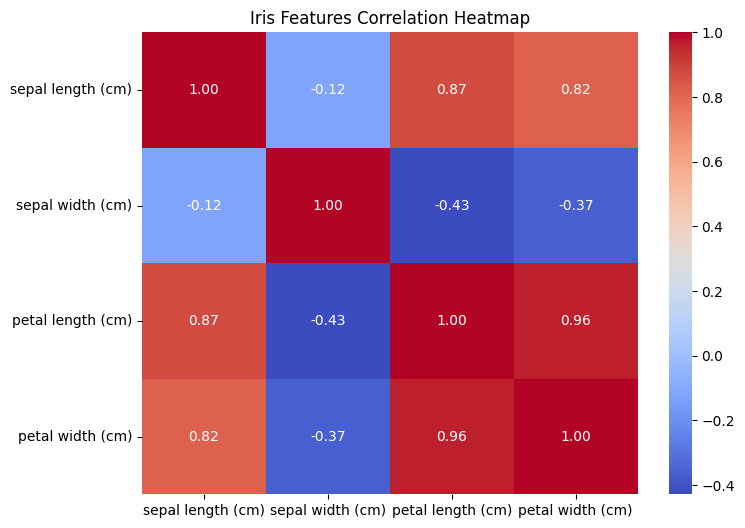

In [137]:
corr_matrix = df.corr()

# Skapa heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Iris Features Correlation Heatmap')
plt.show()


&nbsp; e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot. 


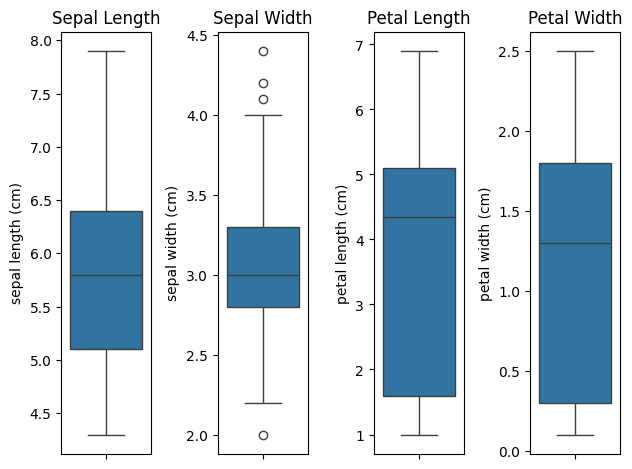

In [138]:


# Skapa en figur och en matris av axlar (subplots)
figsize=(16, 8)

# Boxplot för Sepal Length
plt.subplot(1, 4, 1)  # 1 rad, 4 kolumner, position 1
sns.boxplot(data=df, y='sepal length (cm)')
plt.title('Sepal Length')

# Boxplot för Sepal Width
plt.subplot(1, 4, 2)  # 1 rad, 4 kolumner, position 2
sns.boxplot(data=df, y='sepal width (cm)')
plt.title('Sepal Width')

# Boxplot för Petal Length
plt.subplot(1, 4, 3)  # 1 rad, 4 kolumner, position 3
sns.boxplot(data=df, y='petal length (cm)')
plt.title('Petal Length')

# Boxplot för Petal Width
plt.subplot(1, 4, 4)  # 1 rad, 4 kolumner, position 4
sns.boxplot(data=df, y='petal width (cm)')
plt.title('Petal Width')

# Visa plotten
plt.tight_layout()
plt.show()




&nbsp; f) Now remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

</div>


<div style="max-width:66ch;">

---
## 1. Split and scale data (*)

Do train|test split and scale the data using feature standardization, I used default test size 0.33 and random state 42. Check the mean and standard deviation on training and test data. 


</div>

In [139]:
from sklearn.model_selection import train_test_split

X = df
y = data_dict["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.mean(), scaled_X_train.std(), scaled_X_test.mean(), scaled_X_test.std()

(-2.6645352591003756e-16, 1.0, 0.06366575091978553, 1.0572097452539762)

<div style="max-width:66ch;">

---
## 2. Classify with logistic regression (*)

Use k-folded cross-validation with logistic regression to find suitable hyperparameters and model. Check the documentation to see which parameters that can be chosen through cross-validation. Check the models parameters and see what it has chosen. 

</div>


In [141]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
params = model.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [142]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [143]:
from sklearn.linear_model import LogisticRegressionCV

# Skapa modellen
model = LogisticRegressionCV(cv=5, max_iter=10000)

# Träna modellen med de skalerade träningsdatan
model.fit(scaled_X_train, y_train)

# Nu kan du använda modellen för att göra förutsägelser och utvärdera den på ditt testset
y_pred = model.predict(scaled_X_test)

# Och du kan hämta modellens koefficienter
weights = model.coef_
print(weights)




[[-0.70836399  0.72838673 -1.18175659 -1.09126765]
 [ 0.25988056 -0.41414751 -0.01776215 -0.414214  ]
 [ 0.44848343 -0.31423923  1.19951873  1.50548165]]


<div style="max-width:66ch;">


---
## 3. Evaluate model (*)

Make a prediction on the testing data. 

&nbsp; a) Check manually the first 10 values of $y_{test}$ against your prediction. 


In [144]:

model.fit(scaled_X_train, y_train)

# Gör förutsägelser på testdatan
y_pred = model.predict(scaled_X_test)

# Jämför de första 10 förutsägelserna med de faktiska värdena
y_test_first_10 = y_test[:10]
y_pred_first_10 = y_pred[:10]

(y_test_first_10, y_pred_first_10)

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1]), array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1]))


&nbsp; b) Plot a confusion matrix. Can you see which predictions the model have mispredicted?


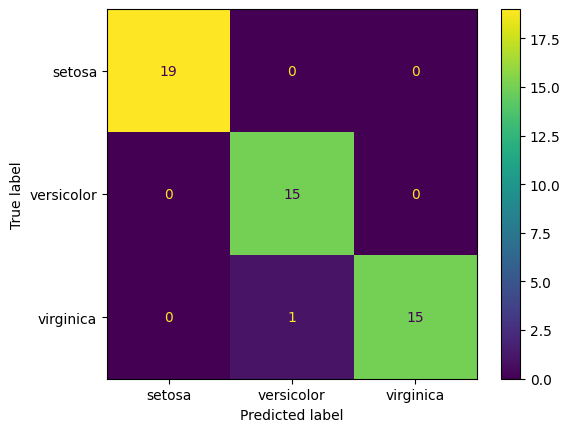

In [145]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

species_names = data_dict.target_names
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=species_names).plot()


&nbsp; c) Print a classification report and interpret it. 

</div>

In [146]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

